In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split

from src.preprocessing import get_processed_data
from src.train import train_and_evaluate_baseline, evaluate, load_file_if_exists, save_file, plot_f1_scores, train_w_hpam_search_and_eval

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform, loguniform
from sklearn.svm import SVC


sns.set_theme('paper')


In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [3]:
target = "status_group"


## BASELINE

In [4]:
model_name = "baseline_log_reg_all_feat"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
baseline_log_reg_all_feat
Train: 0.5705
Test: 0.5623


## BASELINE + feature_engineer

In [5]:
model_name = "baseline_log_reg_all_feat_fe"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="feature_engineer", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
baseline_log_reg_all_feat_fe
Train: 0.5541
Test: 0.5469


## BASELINE + Log_transform

In [6]:
model_name = "baseline_log_reg_all_feat_log_transform"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="log_transform", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")



Found saved F1s. Returning them.
baseline_log_reg_all_feat_log_transform
Train: 0.5697
Test: 0.5631


## BASELINE + log_transform + feature_engineer

In [7]:
model_name = "baseline_log_reg_all_feat_log_transform_fe"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="log_transform+feature_engineer ", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")



Found saved F1s. Returning them.
baseline_log_reg_all_feat_log_transform_fe
Train: 0.5528
Test: 0.5482


## BASELINE + log_transform + feature_engineer + remove_correlated

In [8]:
model_name = "baseline_log_reg_non_cor_feat_log_transform_fe"
train_f1, test_f1, model = train_and_evaluate_baseline(
    preset_name="log_transform+feature_engineer+remove_correlated", 
    model_name=model_name,
    seed=SEED, 
    model_kwargs={
        "max_iter": 1000
    }
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")



Found saved F1s. Returning them.
baseline_log_reg_non_cor_feat_log_transform_fe
Train: 0.5203
Test: 0.5171


In [9]:
def plot_f1_scores(result_dict):
    # Convert dict → DataFrame
    df = pd.DataFrame(result_dict).T.reset_index()
    df.columns = ["Model", "Train F1", "Test F1"]

    # Melt for seaborn
    df_melted = df.melt(id_vars="Model", value_vars=["Train F1", "Test F1"],
                        var_name="Dataset", value_name="F1 Score")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, x="Model", y="F1 Score", hue="Dataset")

    plt.title("Macro F1 Scores by Model")
    plt.ylim(0, 1)  # since F1 is bounded
    plt.xticks(rotation=20)
    plt.legend(title="")

    plt.tight_layout()
    plt.show()

In [4]:
res = load_file_if_exists("results.pkl")

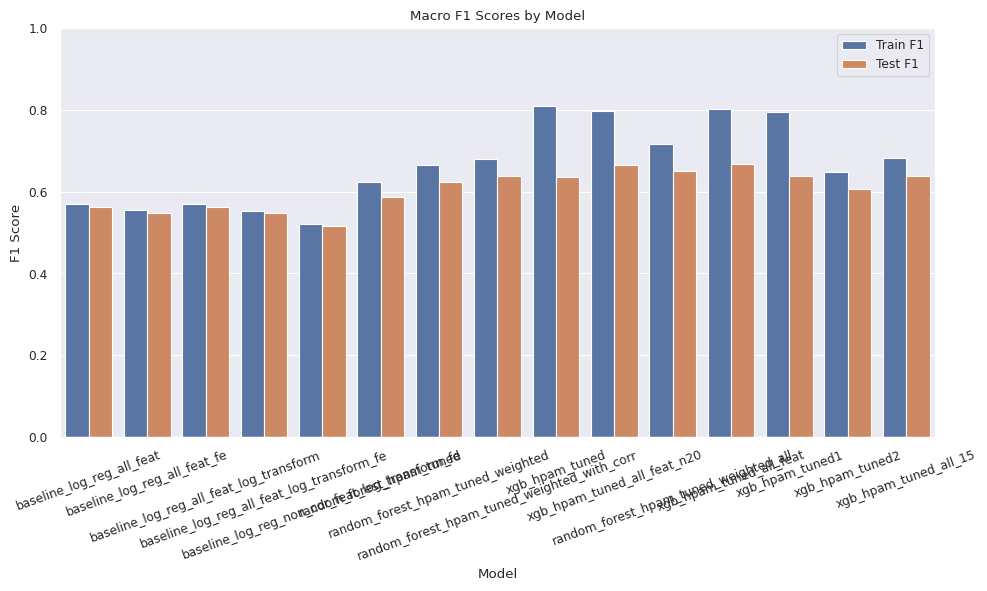

In [5]:
plot_f1_scores(res)

## Complex Models with Hyperparam Tuning

In [9]:
## Fix preset
PRESET = "log_transform+feature_engineer"

In [13]:
model_name = "random_forest_hpam_tuned"
rf = RandomForestClassifier()

param_dist = {
    "n_estimators": randint(50, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name=PRESET,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
random_forest_hpam_tuned
Train: 0.6247
Test: 0.5872


In [14]:
model_name = "random_forest_hpam_tuned_weighted"
rf = RandomForestClassifier(class_weight="balanced_subsample")

param_dist = {
    "n_estimators": randint(50, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name=PRESET,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
random_forest_hpam_tuned_weighted
Train: 0.6655
Test: 0.6248


Fitting 5 folds for each of 20 candidates, totalling 100 fits


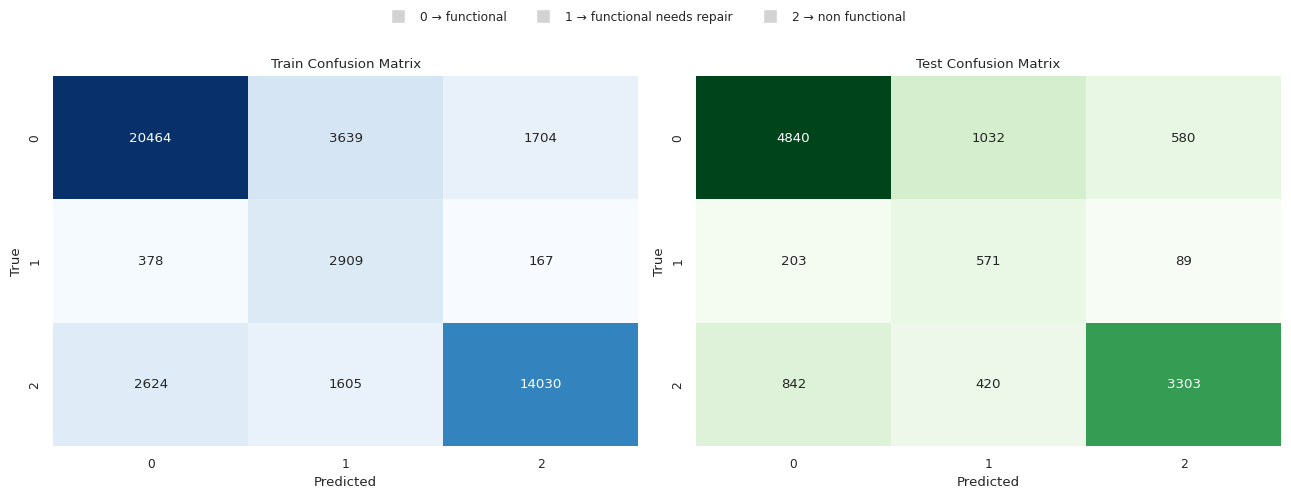

random_forest_hpam_tuned_weighted_all
Train: 0.7178
Test: 0.6514


In [4]:
model_name = "random_forest_hpam_tuned_weighted_all"
rf = RandomForestClassifier(class_weight="balanced_subsample")

param_dist = {
    "n_estimators": randint(50, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name="log_transform+feature_engineer",
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
    n_cols=10
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


In [5]:
train_processed, test_processed, pre = get_processed_data("log_transform+feature_engineer")

y_pred = model.predict(test_processed.drop(columns=["id"]))

# Build dataframe with id and predicted labels
pred_df = pd.DataFrame({
    "id": test_processed["id"].values,
    "status_group": y_pred
})
pred_df["status_group"] = pre.target_le.inverse_transform(pred_df["status_group"])
pred_df.to_csv("rf_sub.csv", index=False)
pred_df.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [15]:
model_name = "random_forest_hpam_tuned_weighted_with_corr"
rf = RandomForestClassifier(class_weight="balanced_subsample")

param_dist = {
    "n_estimators": randint(50, 300),        # number of trees
    "max_depth": randint(3, 20),             # depth of trees
    "min_samples_split": randint(2, 20),     # min samples to split
    "min_samples_leaf": randint(1, 20),      # min samples per leaf
    "max_features": ["sqrt", "log2", None]   # features per split
}

train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=rf,
    preset_name="log_transform+feature_engineer",
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)

print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")


Found saved F1s. Returning them.
random_forest_hpam_tuned_weighted_with_corr
Train: 0.6801
Test: 0.6391


In [16]:
sub = pd.read_csv("data/SubmissionFormat.csv")
sub.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [17]:
train_processed, test_processed, pre = get_processed_data("log_transform+feature_engineer")

In [18]:
test_processed.head()

,id,log_amount_tsh,funder__District Council,funder__Government Of Tanzania,funder__Hesawa,funder__Kkkt,funder__Other,funder__Rwssp,funder__Tasaf,funder__Unicef,...,waterpoint_type__dam,waterpoint_type__hand pump,waterpoint_type__improved spring,waterpoint_type__other,waterpoint_type_group__communal standpipe,waterpoint_type_group__dam,waterpoint_type_group__hand pump,waterpoint_type_group__improved spring,waterpoint_type_group__other,age
0,50785,0.000000,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,1
1,51630,0.000000,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,13
2,17168,0.000000,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,3
3,45559,0.000000,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,26
4,49871,6.216606,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,13


In [19]:
y_pred = model.predict(test_processed.drop(columns=["id"]))

# Build dataframe with id and predicted labels
pred_df = pd.DataFrame({
    "id": test_processed["id"].values,
    "status_group": y_pred
})

pred_df.head()

,id,status_group
0,50785,2
1,51630,0
2,17168,0
3,45559,2
4,49871,0


In [20]:
pred_df["status_group"] = pre.target_le.inverse_transform(pred_df["status_group"])

In [21]:
pred_df.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [22]:
pred_df.to_csv("sample_sub.csv", index=False)

In [23]:
del model

In [ ]:
model_name = "svc_hpam_tuned"
svc = SVC(probability=True, class_weight="balanced", random_state=SEED)
param_dist = {
    "C": loguniform(1e-3, 1e3),
    "gamma": loguniform(1e-4, 1e0),
    "kernel": ["rbf", "poly", "sigmoid"],
    "degree": randint(2, 6),
}
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=svc, preset_name=PRESET, model_name=model_name, param_dist=param_dist, seed=SEED
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Fitting 5 folds for each of 10 candidates, totalling 50 fits


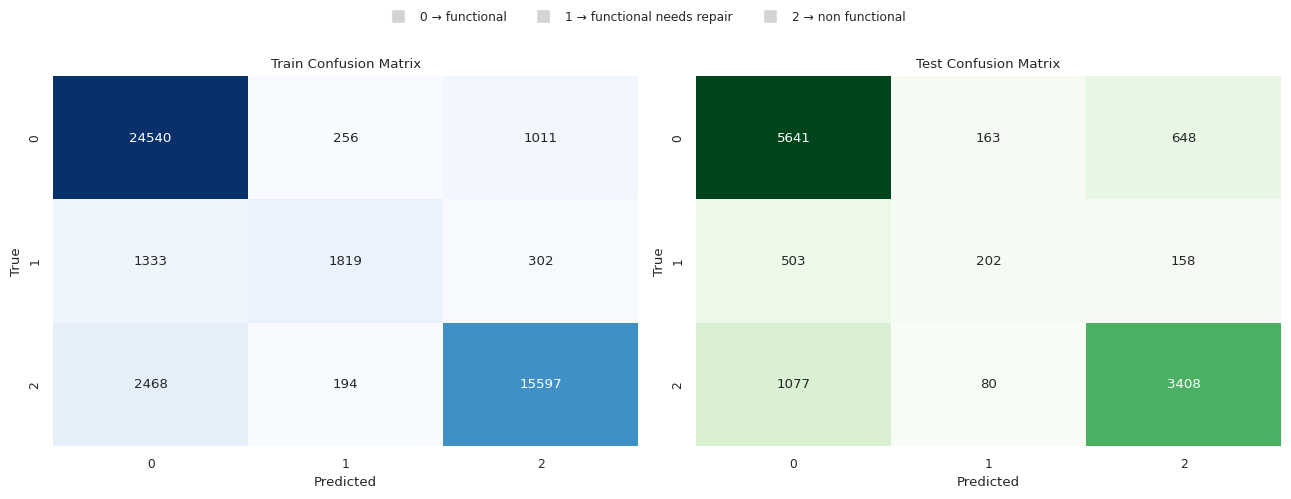

xgb_hpam_tuned
Train: 0.8097
Test: 0.6368


In [24]:
from xgboost import XGBClassifier
# --- XGBoost classifier (multiclass) ---
model_name = "xgb_hpam_tuned"
xgb = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=3,  # ensure correct #classes
    tree_method="hist",           # fast, CPU-friendly; use "gpu_hist" if you have GPU
    random_state=SEED,
    eval_metric="mlogloss"        # metric for training; CV scoring will be f1_macro
)

# --- hyperparameter search space ---
param_dist = {
    "n_estimators": randint(100, 800),
    "max_depth": randint(3, 12),
    "min_child_weight": loguniform(1e-1, 1e2),
    "subsample": uniform(0.5, 0.5),         # 0.5–1.0
    "colsample_bytree": uniform(0.5, 0.5),  # 0.5–1.0
    "gamma": loguniform(1e-4, 1.0),
    "learning_rate": loguniform(1e-3, 3e-1),
    "reg_alpha": loguniform(1e-6, 1e0),     # L1
    "reg_lambda": loguniform(1e-3, 1e2),    # L2
}

# ----- OPTION A: if your helper supports fit_params -----
# (Recommended: add a `fit_params` dict argument to your helper and pass it to RandomizedSearchCV.fit)
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=xgb,
    preset_name=PRESET,
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

In [26]:
train_processed, test_processed, pre = get_processed_data("log_transform+feature_engineer+remove_correlated")

y_pred = model.predict(test_processed.drop(columns=["id"]))

# Build dataframe with id and predicted labels
pred_df = pd.DataFrame({
    "id": test_processed["id"].values,
    "status_group": y_pred
})
pred_df["status_group"] = pre.target_le.inverse_transform(pred_df["status_group"])

pred_df.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [27]:
pred_df.to_csv("xgb_sub.csv", index=False)

In [7]:
from xgboost import XGBClassifier
# --- XGBoost classifier (multiclass) ---
model_name = "xgb_hpam_tuned"
xgb = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=3,  # ensure correct #classes
    tree_method="hist",           # fast, CPU-friendly; use "gpu_hist" if you have GPU
    random_state=SEED,
    eval_metric="mlogloss"        # metric for training; CV scoring will be f1_macro
)

# --- hyperparameter search space ---
param_dist = {
    "n_estimators": randint(100, 700),
    "max_depth": randint(3, 12),
    "min_child_weight": loguniform(1e-1, 1e2),
    "subsample": uniform(0.5, 0.5),         # 0.5–1.0
    "colsample_bytree": uniform(0.5, 0.5),  # 0.5–1.0
    "gamma": loguniform(1e-4, 1.0),
    "learning_rate": loguniform(1e-3, 3e-1),
    "reg_alpha": loguniform(1e-3, 1e0),     # L1
    "reg_lambda": loguniform(1e-3, 1e2),    # L2
}

# ----- OPTION A: if your helper supports fit_params -----
# (Recommended: add a `fit_params` dict argument to your helper and pass it to RandomizedSearchCV.fit)
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=xgb,
    preset_name="log_transform+feature_engineer+remove_correlated",
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
    n_cols=10
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

Found saved F1s. Returning them.
xgb_hpam_tuned
Train: 0.8097
Test: 0.6368


In [ ]:
from xgboost import XGBClassifier
# --- XGBoost classifier (multiclass) ---
model_name = "xgb_hpam_tuned_all_15"
xgb = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=3,  # ensure correct #classes
    tree_method="hist",           # fast, CPU-friendly; use "gpu_hist" if you have GPU
    random_state=SEED,
    eval_metric="mlogloss"        # metric for training; CV scoring will be f1_macro
)

# --- hyperparameter search space ---
param_dist = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(3, 7),
    "min_child_weight": loguniform(1e-1, 1e2),
    "subsample": uniform(0.5, 0.5),         # 0.5–1.0
    "colsample_bytree": uniform(0.5, 0.5),  # 0.5–1.0
    "gamma": loguniform(1e-4, 1.0),
    "learning_rate": loguniform(1e-3, 3e-1),
    "reg_alpha": loguniform(1e-2, 1e1),     # L1
    "reg_lambda": loguniform(1e-2, 1e1),    # L2
}

# ----- OPTION A: if your helper supports fit_params -----
# (Recommended: add a `fit_params` dict argument to your helper and pass it to RandomizedSearchCV.fit)
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=xgb,
    preset_name="log_transform+feature_engineer",
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
    n_cols=15
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

Found saved F1s. Returning them.
xgb_hpam_tuned_all_15
Train: 0.6812
Test: 0.6390


Fitting 5 folds for each of 20 candidates, totalling 100 fits


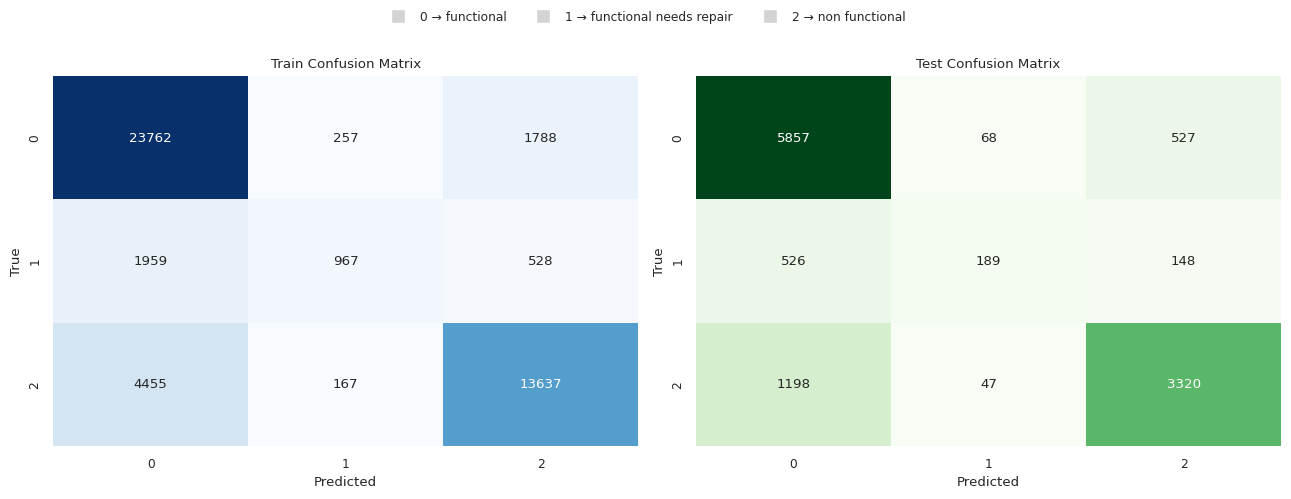

ValueError: feature_names mismatch: ['log_amount_tsh', 'funder__Danida', 'funder__Dhv', 'funder__District Council', 'funder__Dwe', 'funder__Dwsp', 'funder__Germany Republi', 'funder__Government Of Tanzania', 'funder__Hesawa', 'funder__Kkkt', 'funder__Ministry Of Water', 'funder__Norad', 'funder__Other', 'funder__Private Individual', 'funder__Rwssp', 'funder__Tasaf', 'funder__Tcrs', 'funder__Unicef', 'funder__Water', 'funder__World Bank', 'funder__World Vision', 'installer__CES', 'installer__Central government', 'installer__Commu', 'installer__Community', 'installer__DANID', 'installer__DANIDA', 'installer__DWE', 'installer__District Council', 'installer__District council', 'installer__Government', 'installer__HESAWA', 'installer__Hesawa', 'installer__KKKT', 'installer__LGA', 'installer__Other', 'installer__RWE', 'installer__TASAF', 'installer__TCRS', 'installer__WEDECO', 'installer__World vision', 'wpt_name__Hospital', 'wpt_name__Kanisani', 'wpt_name__Kituo Cha Afya', 'wpt_name__Madukani', 'wpt_name__Mbugani', 'wpt_name__Mkombozi', 'wpt_name__Mkuyuni', 'wpt_name__Msikitini', 'wpt_name__Muungano', 'wpt_name__Ofisini', 'wpt_name__Other', 'wpt_name__School', 'wpt_name__Sekondari', 'wpt_name__Shule', 'wpt_name__Shule Ya Msingi', 'wpt_name__Shuleni', 'wpt_name__Sokoni', 'wpt_name__Upendo', 'wpt_name__Zahanati', 'wpt_name__none', 'basin__Lake Nyasa', 'basin__Lake Rukwa', 'basin__Lake Tanganyika', 'basin__Lake Victoria', 'basin__Pangani', 'basin__Rufiji', 'basin__Ruvuma / Southern Coast', 'basin__Wami / Ruvu', 'subvillage__I', 'subvillage__Kanisani', 'subvillage__Kati', 'subvillage__Kibaoni', 'subvillage__M', 'subvillage__Madukani', 'subvillage__Majengo', 'subvillage__Mapinduzi', 'subvillage__Mbuyuni', 'subvillage__Miembeni', 'subvillage__Mjimwema', 'subvillage__Mjini', 'subvillage__Mlimani', 'subvillage__Msikitini', 'subvillage__Mtakuja', 'subvillage__Muungano', 'subvillage__Other', 'subvillage__Shuleni', 'subvillage__Sokoni', 'subvillage__Songambele', 'region__Dodoma', 'region__Iringa', 'region__Kagera', 'region__Kigoma', 'region__Kilimanjaro', 'region__Lindi', 'region__Manyara', 'region__Mara', 'region__Mbeya', 'region__Morogoro', 'region__Mtwara', 'region__Mwanza', 'region__Other', 'region__Pwani', 'region__Rukwa', 'region__Ruvuma', 'region__Shinyanga', 'region__Singida', 'region__Tabora', 'region__Tanga', 'region_code__2', 'region_code__3', 'region_code__4', 'region_code__5', 'region_code__6', 'region_code__10', 'region_code__11', 'region_code__12', 'region_code__13', 'region_code__14', 'region_code__15', 'region_code__16', 'region_code__17', 'region_code__18', 'region_code__19', 'region_code__20', 'region_code__21', 'region_code__60', 'region_code__80', 'region_code__Other', 'district_code__1', 'district_code__2', 'district_code__3', 'district_code__4', 'district_code__5', 'district_code__6', 'district_code__7', 'district_code__8', 'district_code__13', 'district_code__23', 'district_code__30', 'district_code__33', 'district_code__43', 'district_code__53', 'district_code__60', 'district_code__62', 'district_code__63', 'district_code__67', 'district_code__80', 'lga__Bagamoyo', 'lga__Bariadi', 'lga__Kahama', 'lga__Karagwe', 'lga__Kasulu', 'lga__Kibondo', 'lga__Kigoma Rural', 'lga__Kilombero', 'lga__Kilosa', 'lga__Kyela', 'lga__Magu', 'lga__Maswa', 'lga__Mbozi', 'lga__Meru', 'lga__Moshi Rural', 'lga__Njombe', 'lga__Other', 'lga__Rungwe', 'lga__Same', 'lga__Singida Rural', 'ward__Chanika', 'ward__Igosi', 'ward__Imalinyi', 'ward__Itete', 'ward__Kitunda', 'ward__Maji ya Chai', 'ward__Maramba', 'ward__Matola', 'ward__Mdandu', 'ward__Mishamo', 'ward__Msindo', 'ward__Mtwango', 'ward__Nduruma', 'ward__Ngarenanyuki', 'ward__Other', 'ward__Siha Kati', 'ward__Usuka', 'ward__Vikindu', "ward__Wanging'ombe", 'ward__Zinga/Ikerege', 'public_meeting__True', 'scheme_management__Other', 'scheme_management__Parastatal', 'scheme_management__Private operator', 'scheme_management__SWC', 'scheme_management__Trust', 'scheme_management__VWC', 'scheme_management__WUA', 'scheme_management__WUG', 'scheme_management__Water Board', 'scheme_management__Water authority', 'permit__True', 'extraction_type__cemo', 'extraction_type__climax', 'extraction_type__gravity', 'extraction_type__india mark ii', 'extraction_type__india mark iii', 'extraction_type__ksb', 'extraction_type__mono', 'extraction_type__nira/tanira', 'extraction_type__other', 'extraction_type__other - mkulima/shinyanga', 'extraction_type__other - play pump', 'extraction_type__other - rope pump', 'extraction_type__other - swn 81', 'extraction_type__submersible', 'extraction_type__swn 80', 'extraction_type__walimi', 'extraction_type__windmill', 'extraction_type_group__gravity', 'extraction_type_group__india mark ii', 'extraction_type_group__india mark iii', 'extraction_type_group__mono', 'extraction_type_group__nira/tanira', 'extraction_type_group__other', 'extraction_type_group__other handpump', 'extraction_type_group__other motorpump', 'extraction_type_group__rope pump', 'extraction_type_group__submersible', 'extraction_type_group__swn 80', 'extraction_type_group__wind-powered', 'extraction_type_class__handpump', 'extraction_type_class__motorpump', 'extraction_type_class__other', 'extraction_type_class__rope pump', 'extraction_type_class__submersible', 'extraction_type_class__wind-powered', 'management__other', 'management__other - school', 'management__parastatal', 'management__private operator', 'management__trust', 'management__unknown', 'management__vwc', 'management__water authority', 'management__water board', 'management__wua', 'management__wug', 'management_group__other', 'management_group__parastatal', 'management_group__unknown', 'management_group__user-group', 'payment__other', 'payment__pay annually', 'payment__pay monthly', 'payment__pay per bucket', 'payment__pay when scheme fails', 'payment__unknown', 'payment_type__monthly', 'payment_type__never pay', 'payment_type__on failure', 'payment_type__other', 'payment_type__per bucket', 'payment_type__unknown', 'water_quality__fluoride', 'water_quality__fluoride abandoned', 'water_quality__milky', 'water_quality__salty', 'water_quality__salty abandoned', 'water_quality__soft', 'water_quality__unknown', 'quality_group__fluoride', 'quality_group__good', 'quality_group__milky', 'quality_group__salty', 'quality_group__unknown', 'quantity__enough', 'quantity__insufficient', 'quantity__seasonal', 'quantity__unknown', 'quantity_group__enough', 'quantity_group__insufficient', 'quantity_group__seasonal', 'quantity_group__unknown', 'source__hand dtw', 'source__lake', 'source__machine dbh', 'source__other', 'source__rainwater harvesting', 'source__river', 'source__shallow well', 'source__spring', 'source__unknown', 'source_type__dam', 'source_type__other', 'source_type__rainwater harvesting', 'source_type__river/lake', 'source_type__shallow well', 'source_type__spring', 'source_class__surface', 'source_class__unknown', 'waterpoint_type__communal standpipe', 'waterpoint_type__communal standpipe multiple', 'waterpoint_type__dam', 'waterpoint_type__hand pump', 'waterpoint_type__improved spring', 'waterpoint_type__other', 'waterpoint_type_group__communal standpipe', 'waterpoint_type_group__dam', 'waterpoint_type_group__hand pump', 'waterpoint_type_group__improved spring', 'waterpoint_type_group__other', 'age'] ['log_amount_tsh', 'funder__Danida', 'funder__Dhv', 'funder__District Council', 'funder__Dwe', 'funder__Dwsp', 'funder__Germany Republi', 'funder__Government Of Tanzania', 'funder__Hesawa', 'funder__Kkkt', 'funder__Ministry Of Water', 'funder__Norad', 'funder__Other', 'funder__Private Individual', 'funder__Rwssp', 'funder__Tasaf', 'funder__Tcrs', 'funder__Unicef', 'funder__Water', 'funder__World Bank', 'funder__World Vision', 'installer__CES', 'installer__Central government', 'installer__Commu', 'installer__Community', 'installer__DANID', 'installer__DANIDA', 'installer__DWE', 'installer__District Council', 'installer__District council', 'installer__Government', 'installer__HESAWA', 'installer__Hesawa', 'installer__KKKT', 'installer__LGA', 'installer__Other', 'installer__RWE', 'installer__TASAF', 'installer__TCRS', 'installer__WEDECO', 'installer__World vision', 'wpt_name__Hospital', 'wpt_name__Kanisani', 'wpt_name__Kituo Cha Afya', 'wpt_name__Madukani', 'wpt_name__Mbugani', 'wpt_name__Mkombozi', 'wpt_name__Mkuyuni', 'wpt_name__Msikitini', 'wpt_name__Muungano', 'wpt_name__Ofisini', 'wpt_name__Other', 'wpt_name__School', 'wpt_name__Sekondari', 'wpt_name__Shule', 'wpt_name__Shule Ya Msingi', 'wpt_name__Shuleni', 'wpt_name__Sokoni', 'wpt_name__Upendo', 'wpt_name__Zahanati', 'wpt_name__none', 'basin__Lake Nyasa', 'basin__Lake Rukwa', 'basin__Lake Tanganyika', 'basin__Lake Victoria', 'basin__Pangani', 'basin__Rufiji', 'basin__Ruvuma / Southern Coast', 'basin__Wami / Ruvu', 'subvillage__I', 'subvillage__Kanisani', 'subvillage__Kati', 'subvillage__Kibaoni', 'subvillage__M', 'subvillage__Madukani', 'subvillage__Majengo', 'subvillage__Mapinduzi', 'subvillage__Mbuyuni', 'subvillage__Miembeni', 'subvillage__Mjimwema', 'subvillage__Mjini', 'subvillage__Mlimani', 'subvillage__Msikitini', 'subvillage__Mtakuja', 'subvillage__Muungano', 'subvillage__Other', 'subvillage__Shuleni', 'subvillage__Sokoni', 'subvillage__Songambele', 'region__Dodoma', 'region__Iringa', 'region__Kagera', 'region__Kigoma', 'region__Kilimanjaro', 'region__Lindi', 'region__Manyara', 'region__Mara', 'region__Mbeya', 'region__Morogoro', 'region__Mtwara', 'region__Mwanza', 'region__Other', 'region__Pwani', 'region__Rukwa', 'region__Ruvuma', 'region__Shinyanga', 'region__Singida', 'region__Tabora', 'region__Tanga', 'region_code__2', 'region_code__3', 'region_code__4', 'region_code__5', 'region_code__6', 'region_code__10', 'region_code__11', 'region_code__12', 'region_code__13', 'region_code__14', 'region_code__15', 'region_code__16', 'region_code__17', 'region_code__18', 'region_code__19', 'region_code__20', 'region_code__21', 'region_code__60', 'region_code__80', 'region_code__Other', 'district_code__1', 'district_code__2', 'district_code__3', 'district_code__4', 'district_code__5', 'district_code__6', 'district_code__7', 'district_code__8', 'district_code__13', 'district_code__23', 'district_code__30', 'district_code__33', 'district_code__43', 'district_code__53', 'district_code__60', 'district_code__62', 'district_code__63', 'district_code__67', 'district_code__80', 'lga__Bagamoyo', 'lga__Bariadi', 'lga__Kahama', 'lga__Karagwe', 'lga__Kasulu', 'lga__Kibondo', 'lga__Kigoma Rural', 'lga__Kilombero', 'lga__Kilosa', 'lga__Kyela', 'lga__Magu', 'lga__Maswa', 'lga__Mbozi', 'lga__Meru', 'lga__Moshi Rural', 'lga__Njombe', 'lga__Other', 'lga__Rungwe', 'lga__Same', 'lga__Singida Rural', 'ward__Chanika', 'ward__Igosi', 'ward__Imalinyi', 'ward__Itete', 'ward__Kitunda', 'ward__Maji ya Chai', 'ward__Maramba', 'ward__Matola', 'ward__Mdandu', 'ward__Mishamo', 'ward__Msindo', 'ward__Mtwango', 'ward__Nduruma', 'ward__Ngarenanyuki', 'ward__Other', 'ward__Siha Kati', 'ward__Usuka', 'ward__Vikindu', "ward__Wanging'ombe", 'ward__Zinga/Ikerege', 'public_meeting__True', 'scheme_management__Other', 'scheme_management__Parastatal', 'scheme_management__Private operator', 'scheme_management__SWC', 'scheme_management__Trust', 'scheme_management__VWC', 'scheme_management__WUA', 'scheme_management__WUG', 'scheme_management__Water Board', 'scheme_management__Water authority', 'permit__True', 'extraction_type__cemo', 'extraction_type__climax', 'extraction_type__gravity', 'extraction_type__india mark ii', 'extraction_type__india mark iii', 'extraction_type__ksb', 'extraction_type__mono', 'extraction_type__nira/tanira', 'extraction_type__other', 'extraction_type__other - play pump', 'extraction_type__other - rope pump', 'extraction_type__other - swn 81', 'extraction_type__submersible', 'extraction_type__swn 80', 'extraction_type__walimi', 'extraction_type__windmill', 'extraction_type_group__gravity', 'extraction_type_group__india mark ii', 'extraction_type_group__india mark iii', 'extraction_type_group__mono', 'extraction_type_group__nira/tanira', 'extraction_type_group__other', 'extraction_type_group__other handpump', 'extraction_type_group__other motorpump', 'extraction_type_group__rope pump', 'extraction_type_group__submersible', 'extraction_type_group__swn 80', 'extraction_type_group__wind-powered', 'extraction_type_class__handpump', 'extraction_type_class__motorpump', 'extraction_type_class__other', 'extraction_type_class__rope pump', 'extraction_type_class__submersible', 'extraction_type_class__wind-powered', 'management__other', 'management__other - school', 'management__parastatal', 'management__private operator', 'management__trust', 'management__unknown', 'management__vwc', 'management__water authority', 'management__water board', 'management__wua', 'management__wug', 'management_group__other', 'management_group__parastatal', 'management_group__unknown', 'management_group__user-group', 'payment__other', 'payment__pay annually', 'payment__pay monthly', 'payment__pay per bucket', 'payment__pay when scheme fails', 'payment__unknown', 'payment_type__monthly', 'payment_type__never pay', 'payment_type__on failure', 'payment_type__other', 'payment_type__per bucket', 'payment_type__unknown', 'water_quality__fluoride', 'water_quality__fluoride abandoned', 'water_quality__milky', 'water_quality__salty', 'water_quality__salty abandoned', 'water_quality__soft', 'water_quality__unknown', 'quality_group__fluoride', 'quality_group__good', 'quality_group__milky', 'quality_group__salty', 'quality_group__unknown', 'quantity__enough', 'quantity__insufficient', 'quantity__seasonal', 'quantity__unknown', 'quantity_group__enough', 'quantity_group__insufficient', 'quantity_group__seasonal', 'quantity_group__unknown', 'source__hand dtw', 'source__lake', 'source__machine dbh', 'source__other', 'source__rainwater harvesting', 'source__river', 'source__shallow well', 'source__spring', 'source__unknown', 'source_type__dam', 'source_type__other', 'source_type__rainwater harvesting', 'source_type__river/lake', 'source_type__shallow well', 'source_type__spring', 'source_class__surface', 'source_class__unknown', 'waterpoint_type__communal standpipe', 'waterpoint_type__communal standpipe multiple', 'waterpoint_type__dam', 'waterpoint_type__hand pump', 'waterpoint_type__improved spring', 'waterpoint_type__other', 'waterpoint_type_group__communal standpipe', 'waterpoint_type_group__dam', 'waterpoint_type_group__hand pump', 'waterpoint_type_group__improved spring', 'waterpoint_type_group__other', 'age']
expected extraction_type__other - mkulima/shinyanga in input data

In [7]:
from xgboost import XGBClassifier
# --- XGBoost classifier (multiclass) ---
model_name = "xgb_hpam_tuned_all_20"
xgb = XGBClassifier(
    objective="multi:softprob",   # multiclass
    num_class=3,  # ensure correct #classes
    tree_method="hist",           # fast, CPU-friendly; use "gpu_hist" if you have GPU
    random_state=SEED,
    eval_metric="mlogloss"        # metric for training; CV scoring will be f1_macro
)

# --- hyperparameter search space ---
param_dist = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(3, 7),
    "min_child_weight": loguniform(1e-1, 1e2),
    "subsample": uniform(0.5, 0.5),         # 0.5–1.0
    "colsample_bytree": uniform(0.5, 0.5),  # 0.5–1.0
    "gamma": loguniform(1e-4, 1.0),
    "learning_rate": loguniform(1e-3, 3e-1),
    "reg_alpha": loguniform(1e-2, 1e1),     # L1
    "reg_lambda": loguniform(1e-2, 1e1),    # L2
}

# ----- OPTION A: if your helper supports fit_params -----
# (Recommended: add a `fit_params` dict argument to your helper and pass it to RandomizedSearchCV.fit)
train_f1, test_f1, model = train_w_hpam_search_and_eval(
    model=xgb,
    preset_name="log_transform+feature_engineer",
    model_name=model_name,
    param_dist=param_dist,
    seed=SEED,
    n_cols=20
)
print(f"{model_name}\nTrain: {train_f1:.4f}\nTest: {test_f1:.4f}")

In [3]:
test_processed.head()

NameError: name 'test_processed' is not defined

In [ ]:
train_processed.shape, test_processed.shape

((59400, 312), (14850, 311))

In [10]:
train_processed, test_processed, pre = get_processed_data("log_transform+feature_engineer", n_cols=20)

y_pred = model.predict(test_processed.drop(columns=["id"]))

# Build dataframe with id and predicted labels
pred_df = pd.DataFrame({
    "id": test_processed["id"].values,
    "status_group": y_pred
})
pred_df["status_group"] = pre.target_le.inverse_transform(pred_df["status_group"])
pred_df.to_csv("xgb_all_sub.csv", index=False)

pred_df.head()

ValueError: feature_names mismatch: ['log_amount_tsh', 'funder__Danida', 'funder__Dhv', 'funder__District Council', 'funder__Dwe', 'funder__Dwsp', 'funder__Germany Republi', 'funder__Government Of Tanzania', 'funder__Hesawa', 'funder__Kkkt', 'funder__Ministry Of Water', 'funder__Norad', 'funder__Other', 'funder__Private Individual', 'funder__Rwssp', 'funder__Tasaf', 'funder__Tcrs', 'funder__Unicef', 'funder__Water', 'funder__World Bank', 'funder__World Vision', 'installer__CES', 'installer__Central government', 'installer__Commu', 'installer__Community', 'installer__DANID', 'installer__DANIDA', 'installer__DWE', 'installer__District Council', 'installer__District council', 'installer__Government', 'installer__HESAWA', 'installer__Hesawa', 'installer__KKKT', 'installer__LGA', 'installer__Other', 'installer__RWE', 'installer__TASAF', 'installer__TCRS', 'installer__WEDECO', 'installer__World vision', 'wpt_name__Hospital', 'wpt_name__Kanisani', 'wpt_name__Kituo Cha Afya', 'wpt_name__Madukani', 'wpt_name__Mbugani', 'wpt_name__Mkombozi', 'wpt_name__Mkuyuni', 'wpt_name__Msikitini', 'wpt_name__Muungano', 'wpt_name__Ofisini', 'wpt_name__Other', 'wpt_name__School', 'wpt_name__Sekondari', 'wpt_name__Shule', 'wpt_name__Shule Ya Msingi', 'wpt_name__Shuleni', 'wpt_name__Sokoni', 'wpt_name__Upendo', 'wpt_name__Zahanati', 'wpt_name__none', 'basin__Lake Nyasa', 'basin__Lake Rukwa', 'basin__Lake Tanganyika', 'basin__Lake Victoria', 'basin__Pangani', 'basin__Rufiji', 'basin__Ruvuma / Southern Coast', 'basin__Wami / Ruvu', 'subvillage__I', 'subvillage__Kanisani', 'subvillage__Kati', 'subvillage__Kibaoni', 'subvillage__M', 'subvillage__Madukani', 'subvillage__Majengo', 'subvillage__Mapinduzi', 'subvillage__Mbuyuni', 'subvillage__Miembeni', 'subvillage__Mjimwema', 'subvillage__Mjini', 'subvillage__Mlimani', 'subvillage__Msikitini', 'subvillage__Mtakuja', 'subvillage__Muungano', 'subvillage__Other', 'subvillage__Shuleni', 'subvillage__Sokoni', 'subvillage__Songambele', 'region__Dodoma', 'region__Iringa', 'region__Kagera', 'region__Kigoma', 'region__Kilimanjaro', 'region__Lindi', 'region__Manyara', 'region__Mara', 'region__Mbeya', 'region__Morogoro', 'region__Mtwara', 'region__Mwanza', 'region__Other', 'region__Pwani', 'region__Rukwa', 'region__Ruvuma', 'region__Shinyanga', 'region__Singida', 'region__Tabora', 'region__Tanga', 'region_code__2', 'region_code__3', 'region_code__4', 'region_code__5', 'region_code__6', 'region_code__10', 'region_code__11', 'region_code__12', 'region_code__13', 'region_code__14', 'region_code__15', 'region_code__16', 'region_code__17', 'region_code__18', 'region_code__19', 'region_code__20', 'region_code__21', 'region_code__60', 'region_code__80', 'region_code__Other', 'district_code__1', 'district_code__2', 'district_code__3', 'district_code__4', 'district_code__5', 'district_code__6', 'district_code__7', 'district_code__8', 'district_code__13', 'district_code__23', 'district_code__30', 'district_code__33', 'district_code__43', 'district_code__53', 'district_code__60', 'district_code__62', 'district_code__63', 'district_code__67', 'district_code__80', 'lga__Bagamoyo', 'lga__Bariadi', 'lga__Kahama', 'lga__Karagwe', 'lga__Kasulu', 'lga__Kibondo', 'lga__Kigoma Rural', 'lga__Kilombero', 'lga__Kilosa', 'lga__Kyela', 'lga__Magu', 'lga__Maswa', 'lga__Mbozi', 'lga__Meru', 'lga__Moshi Rural', 'lga__Njombe', 'lga__Other', 'lga__Rungwe', 'lga__Same', 'lga__Singida Rural', 'ward__Chanika', 'ward__Igosi', 'ward__Imalinyi', 'ward__Itete', 'ward__Kitunda', 'ward__Maji ya Chai', 'ward__Maramba', 'ward__Matola', 'ward__Mdandu', 'ward__Mishamo', 'ward__Msindo', 'ward__Mtwango', 'ward__Nduruma', 'ward__Ngarenanyuki', 'ward__Other', 'ward__Siha Kati', 'ward__Usuka', 'ward__Vikindu', "ward__Wanging'ombe", 'ward__Zinga/Ikerege', 'public_meeting__True', 'scheme_management__Other', 'scheme_management__Parastatal', 'scheme_management__Private operator', 'scheme_management__SWC', 'scheme_management__Trust', 'scheme_management__VWC', 'scheme_management__WUA', 'scheme_management__WUG', 'scheme_management__Water Board', 'scheme_management__Water authority', 'permit__True', 'extraction_type__cemo', 'extraction_type__climax', 'extraction_type__gravity', 'extraction_type__india mark ii', 'extraction_type__india mark iii', 'extraction_type__ksb', 'extraction_type__mono', 'extraction_type__nira/tanira', 'extraction_type__other', 'extraction_type__other - mkulima/shinyanga', 'extraction_type__other - play pump', 'extraction_type__other - rope pump', 'extraction_type__other - swn 81', 'extraction_type__submersible', 'extraction_type__swn 80', 'extraction_type__walimi', 'extraction_type__windmill', 'extraction_type_group__gravity', 'extraction_type_group__india mark ii', 'extraction_type_group__india mark iii', 'extraction_type_group__mono', 'extraction_type_group__nira/tanira', 'extraction_type_group__other', 'extraction_type_group__other handpump', 'extraction_type_group__other motorpump', 'extraction_type_group__rope pump', 'extraction_type_group__submersible', 'extraction_type_group__swn 80', 'extraction_type_group__wind-powered', 'extraction_type_class__handpump', 'extraction_type_class__motorpump', 'extraction_type_class__other', 'extraction_type_class__rope pump', 'extraction_type_class__submersible', 'extraction_type_class__wind-powered', 'management__other', 'management__other - school', 'management__parastatal', 'management__private operator', 'management__trust', 'management__unknown', 'management__vwc', 'management__water authority', 'management__water board', 'management__wua', 'management__wug', 'management_group__other', 'management_group__parastatal', 'management_group__unknown', 'management_group__user-group', 'payment__other', 'payment__pay annually', 'payment__pay monthly', 'payment__pay per bucket', 'payment__pay when scheme fails', 'payment__unknown', 'payment_type__monthly', 'payment_type__never pay', 'payment_type__on failure', 'payment_type__other', 'payment_type__per bucket', 'payment_type__unknown', 'water_quality__fluoride', 'water_quality__fluoride abandoned', 'water_quality__milky', 'water_quality__salty', 'water_quality__salty abandoned', 'water_quality__soft', 'water_quality__unknown', 'quality_group__fluoride', 'quality_group__good', 'quality_group__milky', 'quality_group__salty', 'quality_group__unknown', 'quantity__enough', 'quantity__insufficient', 'quantity__seasonal', 'quantity__unknown', 'quantity_group__enough', 'quantity_group__insufficient', 'quantity_group__seasonal', 'quantity_group__unknown', 'source__hand dtw', 'source__lake', 'source__machine dbh', 'source__other', 'source__rainwater harvesting', 'source__river', 'source__shallow well', 'source__spring', 'source__unknown', 'source_type__dam', 'source_type__other', 'source_type__rainwater harvesting', 'source_type__river/lake', 'source_type__shallow well', 'source_type__spring', 'source_class__surface', 'source_class__unknown', 'waterpoint_type__communal standpipe', 'waterpoint_type__communal standpipe multiple', 'waterpoint_type__dam', 'waterpoint_type__hand pump', 'waterpoint_type__improved spring', 'waterpoint_type__other', 'waterpoint_type_group__communal standpipe', 'waterpoint_type_group__dam', 'waterpoint_type_group__hand pump', 'waterpoint_type_group__improved spring', 'waterpoint_type_group__other', 'age'] ['log_amount_tsh', 'funder__Danida', 'funder__Dhv', 'funder__District Council', 'funder__Dwe', 'funder__Dwsp', 'funder__Germany Republi', 'funder__Government Of Tanzania', 'funder__Hesawa', 'funder__Kkkt', 'funder__Ministry Of Water', 'funder__Norad', 'funder__Other', 'funder__Private Individual', 'funder__Rwssp', 'funder__Tasaf', 'funder__Tcrs', 'funder__Unicef', 'funder__Water', 'funder__World Bank', 'funder__World Vision', 'installer__CES', 'installer__Central government', 'installer__Commu', 'installer__Community', 'installer__DANID', 'installer__DANIDA', 'installer__DWE', 'installer__District Council', 'installer__District council', 'installer__Government', 'installer__HESAWA', 'installer__Hesawa', 'installer__KKKT', 'installer__LGA', 'installer__Other', 'installer__RWE', 'installer__TASAF', 'installer__TCRS', 'installer__WEDECO', 'installer__World vision', 'wpt_name__Hospital', 'wpt_name__Kanisani', 'wpt_name__Kituo Cha Afya', 'wpt_name__Madukani', 'wpt_name__Mbugani', 'wpt_name__Mkombozi', 'wpt_name__Mkuyuni', 'wpt_name__Msikitini', 'wpt_name__Muungano', 'wpt_name__Ofisini', 'wpt_name__Other', 'wpt_name__School', 'wpt_name__Sekondari', 'wpt_name__Shule', 'wpt_name__Shule Ya Msingi', 'wpt_name__Shuleni', 'wpt_name__Sokoni', 'wpt_name__Upendo', 'wpt_name__Zahanati', 'wpt_name__none', 'basin__Lake Nyasa', 'basin__Lake Rukwa', 'basin__Lake Tanganyika', 'basin__Lake Victoria', 'basin__Pangani', 'basin__Rufiji', 'basin__Ruvuma / Southern Coast', 'basin__Wami / Ruvu', 'subvillage__I', 'subvillage__Kanisani', 'subvillage__Kati', 'subvillage__Kibaoni', 'subvillage__M', 'subvillage__Madukani', 'subvillage__Majengo', 'subvillage__Mapinduzi', 'subvillage__Mbuyuni', 'subvillage__Miembeni', 'subvillage__Mjimwema', 'subvillage__Mjini', 'subvillage__Mlimani', 'subvillage__Msikitini', 'subvillage__Mtakuja', 'subvillage__Muungano', 'subvillage__Other', 'subvillage__Shuleni', 'subvillage__Sokoni', 'subvillage__Songambele', 'region__Dodoma', 'region__Iringa', 'region__Kagera', 'region__Kigoma', 'region__Kilimanjaro', 'region__Lindi', 'region__Manyara', 'region__Mara', 'region__Mbeya', 'region__Morogoro', 'region__Mtwara', 'region__Mwanza', 'region__Other', 'region__Pwani', 'region__Rukwa', 'region__Ruvuma', 'region__Shinyanga', 'region__Singida', 'region__Tabora', 'region__Tanga', 'region_code__2', 'region_code__3', 'region_code__4', 'region_code__5', 'region_code__6', 'region_code__10', 'region_code__11', 'region_code__12', 'region_code__13', 'region_code__14', 'region_code__15', 'region_code__16', 'region_code__17', 'region_code__18', 'region_code__19', 'region_code__20', 'region_code__21', 'region_code__60', 'region_code__80', 'region_code__Other', 'district_code__1', 'district_code__2', 'district_code__3', 'district_code__4', 'district_code__5', 'district_code__6', 'district_code__7', 'district_code__8', 'district_code__13', 'district_code__23', 'district_code__30', 'district_code__33', 'district_code__43', 'district_code__53', 'district_code__60', 'district_code__62', 'district_code__63', 'district_code__67', 'district_code__80', 'lga__Bagamoyo', 'lga__Bariadi', 'lga__Kahama', 'lga__Karagwe', 'lga__Kasulu', 'lga__Kibondo', 'lga__Kigoma Rural', 'lga__Kilombero', 'lga__Kilosa', 'lga__Kyela', 'lga__Magu', 'lga__Maswa', 'lga__Mbozi', 'lga__Meru', 'lga__Moshi Rural', 'lga__Njombe', 'lga__Other', 'lga__Rungwe', 'lga__Same', 'lga__Singida Rural', 'ward__Chanika', 'ward__Igosi', 'ward__Imalinyi', 'ward__Itete', 'ward__Kitunda', 'ward__Maji ya Chai', 'ward__Maramba', 'ward__Matola', 'ward__Mdandu', 'ward__Mishamo', 'ward__Msindo', 'ward__Mtwango', 'ward__Nduruma', 'ward__Ngarenanyuki', 'ward__Other', 'ward__Siha Kati', 'ward__Usuka', 'ward__Vikindu', "ward__Wanging'ombe", 'ward__Zinga/Ikerege', 'public_meeting__True', 'scheme_management__Other', 'scheme_management__Parastatal', 'scheme_management__Private operator', 'scheme_management__SWC', 'scheme_management__Trust', 'scheme_management__VWC', 'scheme_management__WUA', 'scheme_management__WUG', 'scheme_management__Water Board', 'scheme_management__Water authority', 'permit__True', 'extraction_type__cemo', 'extraction_type__climax', 'extraction_type__gravity', 'extraction_type__india mark ii', 'extraction_type__india mark iii', 'extraction_type__ksb', 'extraction_type__mono', 'extraction_type__nira/tanira', 'extraction_type__other', 'extraction_type__other - play pump', 'extraction_type__other - rope pump', 'extraction_type__other - swn 81', 'extraction_type__submersible', 'extraction_type__swn 80', 'extraction_type__walimi', 'extraction_type__windmill', 'extraction_type_group__gravity', 'extraction_type_group__india mark ii', 'extraction_type_group__india mark iii', 'extraction_type_group__mono', 'extraction_type_group__nira/tanira', 'extraction_type_group__other', 'extraction_type_group__other handpump', 'extraction_type_group__other motorpump', 'extraction_type_group__rope pump', 'extraction_type_group__submersible', 'extraction_type_group__swn 80', 'extraction_type_group__wind-powered', 'extraction_type_class__handpump', 'extraction_type_class__motorpump', 'extraction_type_class__other', 'extraction_type_class__rope pump', 'extraction_type_class__submersible', 'extraction_type_class__wind-powered', 'management__other', 'management__other - school', 'management__parastatal', 'management__private operator', 'management__trust', 'management__unknown', 'management__vwc', 'management__water authority', 'management__water board', 'management__wua', 'management__wug', 'management_group__other', 'management_group__parastatal', 'management_group__unknown', 'management_group__user-group', 'payment__other', 'payment__pay annually', 'payment__pay monthly', 'payment__pay per bucket', 'payment__pay when scheme fails', 'payment__unknown', 'payment_type__monthly', 'payment_type__never pay', 'payment_type__on failure', 'payment_type__other', 'payment_type__per bucket', 'payment_type__unknown', 'water_quality__fluoride', 'water_quality__fluoride abandoned', 'water_quality__milky', 'water_quality__salty', 'water_quality__salty abandoned', 'water_quality__soft', 'water_quality__unknown', 'quality_group__fluoride', 'quality_group__good', 'quality_group__milky', 'quality_group__salty', 'quality_group__unknown', 'quantity__enough', 'quantity__insufficient', 'quantity__seasonal', 'quantity__unknown', 'quantity_group__enough', 'quantity_group__insufficient', 'quantity_group__seasonal', 'quantity_group__unknown', 'source__hand dtw', 'source__lake', 'source__machine dbh', 'source__other', 'source__rainwater harvesting', 'source__river', 'source__shallow well', 'source__spring', 'source__unknown', 'source_type__dam', 'source_type__other', 'source_type__rainwater harvesting', 'source_type__river/lake', 'source_type__shallow well', 'source_type__spring', 'source_class__surface', 'source_class__unknown', 'waterpoint_type__communal standpipe', 'waterpoint_type__communal standpipe multiple', 'waterpoint_type__dam', 'waterpoint_type__hand pump', 'waterpoint_type__improved spring', 'waterpoint_type__other', 'waterpoint_type_group__communal standpipe', 'waterpoint_type_group__dam', 'waterpoint_type_group__hand pump', 'waterpoint_type_group__improved spring', 'waterpoint_type_group__other', 'age']
expected extraction_type__other - mkulima/shinyanga in input data